# Exercice 4 : Visualisation avec t-SNE

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.spatial import ConvexHull
from sklearn.mixture import *
from scipy import linalg
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Using TensorFlow backend.


In [2]:
def convexHulls(points, labels):
  # computing convex hulls for a set of points with asscoiated labels
  convex_hulls = []
  for i in range(10):
    convex_hulls.append(ConvexHull(points[labels==i,:]))
  return convex_hulls
def best_ellipses(points, labels):
  # computing best fiiting ellipse for a set of points with asscoiated labels
  gaussians = []
  for i in range(10):
    gaussians.append(GaussianMixture(n_components=1, covariance_type='full').fit(points[labels==i, :]))
  return gaussians

def neighboring_hit(points, labels):
  k = 6
  nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(points)
  distances, indices = nbrs.kneighbors(points)

  txs = 0.0
  txsc = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  nppts = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

  for i in range(len(points)):
    tx = 0.0
    for j in range(1,k+1):
      if (labels[indices[i,j]]== labels[i]):
        tx += 1
        tx /= k
        txsc[labels[i]] += tx
        nppts[labels[i]] += 1
        txs += tx

  for i in range(10):
    txsc[i] /= nppts[i]

  return txs / len(points)

def visualization(points2D, labels, convex_hulls, ellipses ,projname, nh):

  points2D_c= []
  for i in range(10):
      points2D_c.append(points2D[labels==i, :])
  # Data Visualization
  cmap =cm.tab10

  plt.figure(figsize=(3.841, 7.195), dpi=100)
  plt.set_cmap(cmap)
  plt.subplots_adjust(hspace=0.4 )
  plt.subplot(311)
  plt.scatter(points2D[:,0], points2D[:,1], c=labels,  s=3,edgecolors='none', cmap=cmap, alpha=1.0)
  plt.colorbar(ticks=range(10))

  plt.title("2D "+projname+" - NH="+str(nh*100.0))

  vals = [ i/10.0 for i in range(10)]
  sp2 = plt.subplot(312)
  for i in range(10):
      ch = np.append(convex_hulls[i].vertices,convex_hulls[i].vertices[0])
      sp2.plot(points2D_c[i][ch, 0], points2D_c[i][ch, 1], '-',label='$%i$'%i, color=cmap(vals[i]))
  plt.colorbar(ticks=range(10))
  plt.title(projname+" Convex Hulls")

  def plot_results(X, Y_, means, covariances, index, title, color):
      splot = plt.subplot(3, 1, 3)
      for i, (mean, covar) in enumerate(zip(means, covariances)):
          v, w = linalg.eigh(covar)
          v = 2. * np.sqrt(2.) * np.sqrt(v)
          u = w[0] / linalg.norm(w[0])
          # as the DP will not use every component it has access to
          # unless it needs it, we shouldn't plot the redundant
          # components.
          if not np.any(Y_ == i):
              continue
          plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color, alpha = 0.2)

          # Plot an ellipse to show the Gaussian component
          angle = np.arctan(u[1] / u[0])
          angle = 180. * angle / np.pi  # convert to degrees
          ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
          ell.set_clip_box(splot.bbox)
          ell.set_alpha(0.6)
          splot.add_artist(ell)

      plt.title(title)
  plt.subplot(313)

  for i in range(10):
      plot_results(points2D[labels==i, :], ellipses[i].predict(points2D[labels==i, :]), ellipses[i].means_,
      ellipses[i].covariances_, 0,projname+" fitting ellipses", cmap(vals[i]))

  plt.savefig(projname+".png", dpi=100)
  plt.show()


In [3]:

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [4]:
X_embedded = TSNE(n_components=2, perplexity=30.0, init='pca', verbose=2).fit_transform(X_test)

X_embedded_PCA = PCA(n_components=2, svd_solver='full').fit_transform(X_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.515s...
[t-SNE] Computed neighbors for 10000 samples in 284.696s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.030838
[t-SNE] Computed conditional probabilities in 1.825s
[t-SNE] Iteration 50: error = 84.6570511, gradient norm = 0.0046802 (50 iterations in 28.300s)
[t-SNE]

In [10]:
# Function Call
convex_hulls= convexHulls(X_embedded, y_test)
convex_hullsPca= convexHulls(X_embedded_PCA, y_test)

In [11]:
nh= neighboring_hit(X_embedded, y_test)
nhPca= neighboring_hit(X_embedded_PCA, y_test)


In [12]:
# Function Call
ellipses = best_ellipses(X_embedded, y_test)
ellipsesPca = best_ellipses(X_embedded_PCA, y_test)

C:\Users\utilisateur\Anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\utilisateur\Anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\utilisateur\Anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same ar

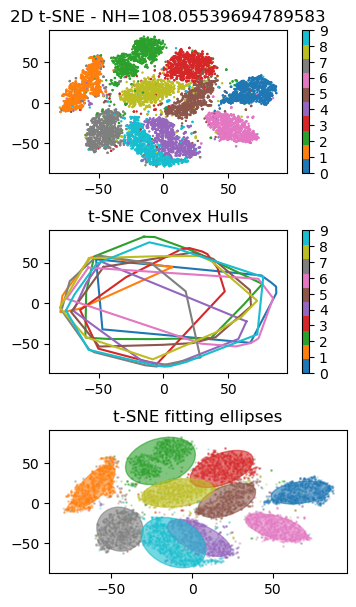

In [13]:
#[t-SNE] Error after 1000 iterations: 1.781618
visualization(X_embedded, y_test, convex_hulls, ellipses ,'t-SNE', nh)

C:\Users\utilisateur\Anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\utilisateur\Anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\utilisateur\Anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same ar

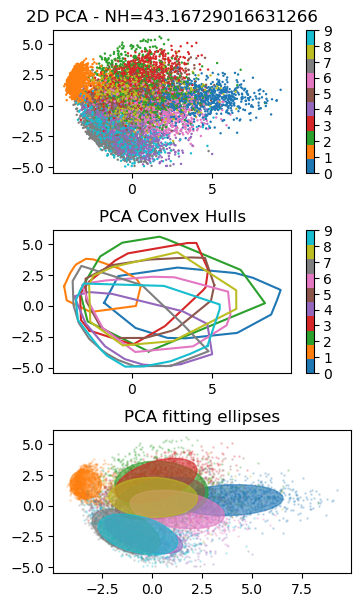

In [14]:
visualization(X_embedded_PCA, y_test, convex_hullsPca, ellipsesPca ,'PCA', nhPca)